In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
cancer = load_breast_cancer()

# 악성은 target이  0, 양성은 1

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

print(len(malignant))
print(len(benign))

212
357


In [20]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
# 표준화와 학습

ss = StandardScaler()
X_std = ss.fit_transform(cancer.data)

pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [25]:
print(f'X_pca shape : {X_pca.shape}')
print(f'Explained Variance Ration : {pca.explained_variance_ratio_}')

X_pca shape : (569, 3)
Explained Variance Ration : [0.44272026 0.18971182]


In [27]:
# DataFrame으로 변환

X_pca = pd.DataFrame(X_pca, columns =['pca1','pca2'])
X_pca['target'] = cancer.target

pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]
X_pca.head(10)

,pca1,pca2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
5,2.380247,3.949929,0
6,2.238883,-2.690031,0
7,2.143299,2.340244,0
8,3.174924,3.391813,0
9,6.351747,7.727174,0


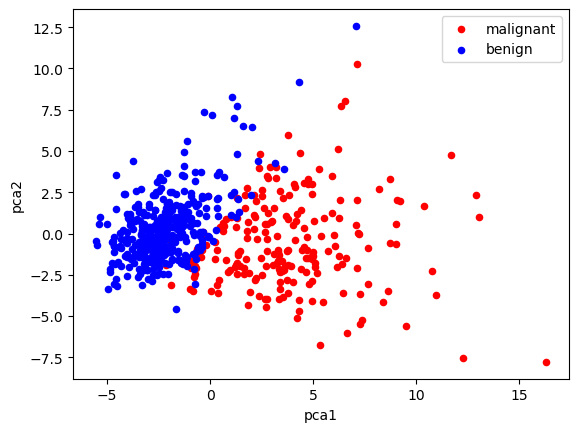

In [28]:
ax = pca_malignant.plot.scatter(x='pca1', y='pca2', color = 'red', label ='malignant')
pca_benign.plot.scatter(x ='pca1', y='pca2', color = 'blue', label = 'benign', ax = ax)
plt.show()